In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error

In [138]:
#!pip install missingno

In [139]:
import missingno as msno

In [140]:
train = pd.read_csv('./open data/train.csv', index_col=0)
test = pd.read_csv('./open data/test_x.csv', index_col=0)

In [141]:
train.shape + test.shape

(45532, 77, 11383, 76)

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

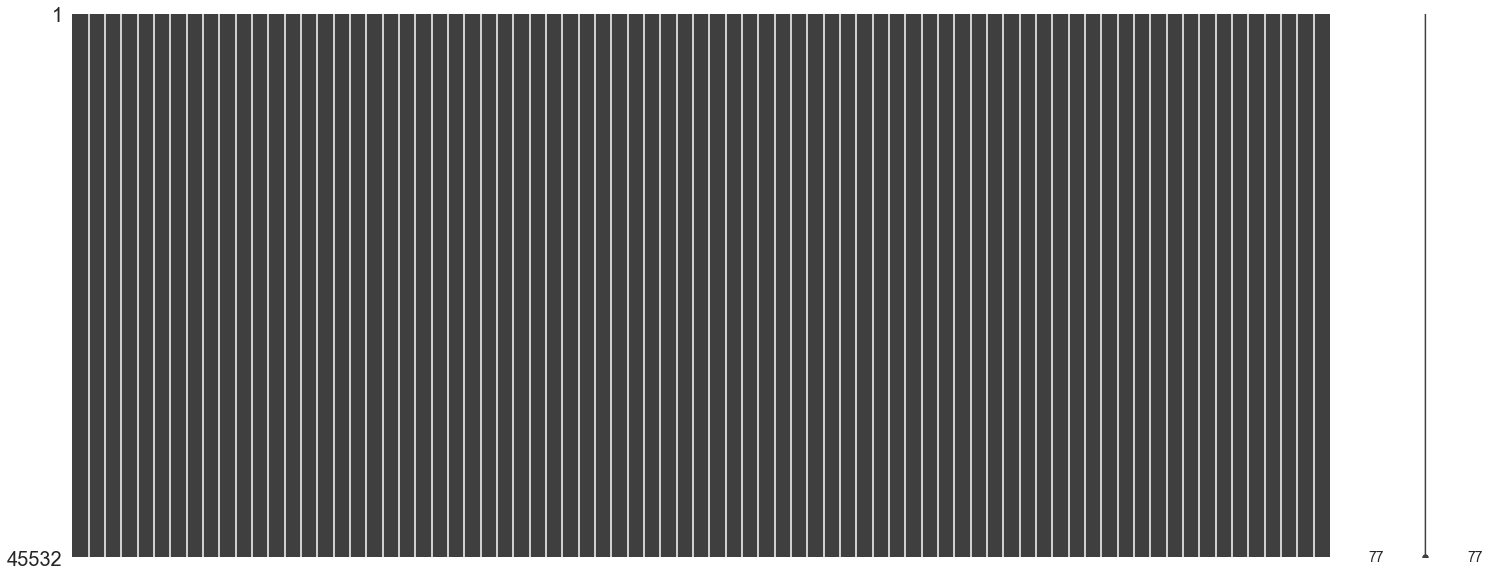

In [143]:
msno.matrix(train)

In [144]:
train.head(20)

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,...,0,0,0,0,1,0,0,0,0,0
6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,...,1,1,1,1,1,0,1,0,1,1
7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,1266,...,1,1,1,1,1,1,1,0,1,1
8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,...,0,0,0,0,1,0,0,0,1,1


In [145]:
train['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [146]:
import matplotlib.pyplot as plt
# matplotlib inline
import seaborn as sns
sns.set()

In [147]:
def bar_chart(feature):
    voted = train[train['voted']==1][feature].value_counts()
    not_voted = train[train['voted']==2][feature].value_counts()
    chart_df = pd.DataFrame([voted, not_voted])
    chart_df.index = ['voted', 'not_voted']
    chart_df.plot(kind='bar', stacked=True, figsize=(10, 5), rot=0)

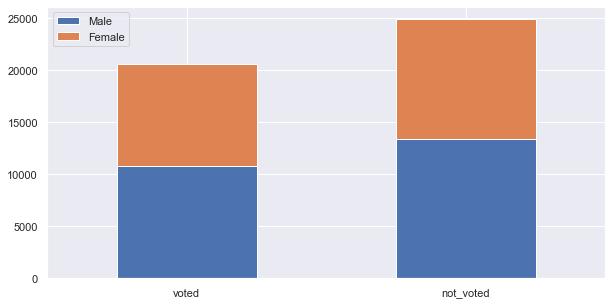

In [148]:
bar_chart('gender')

## 기본정보와 Qde, Qda만 남기고 변수 제거

In [149]:
drop_val = ['QaA', 'QbA', 'QbE', 'QcA', 'QcE', 'QdE', 'QeA','QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE','tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

train = train.drop(drop_val, axis = 1)
test = test.drop(drop_val, axis = 1)
train.head()
test.head()

,QaE,QdA,age_group,education,engnat,familysize,gender,hand,married,race,religion
index,,,,,,,,,,,
0,736,1.0,10s,2,2,3,Male,1,1,White,Christian_Protestant
1,514,3.0,10s,2,2,2,Male,2,1,Other,Christian_Catholic
2,500,2.0,30s,3,2,7,Male,1,2,Other,Christian_Other
3,669,2.0,60s,4,1,4,Male,1,2,White,Christian_Catholic
4,499,2.0,10s,2,1,3,Male,1,1,White,Agnostic


In [150]:
print("train : ", train.isnull().sum())

train :  QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
voted         0
dtype: int64


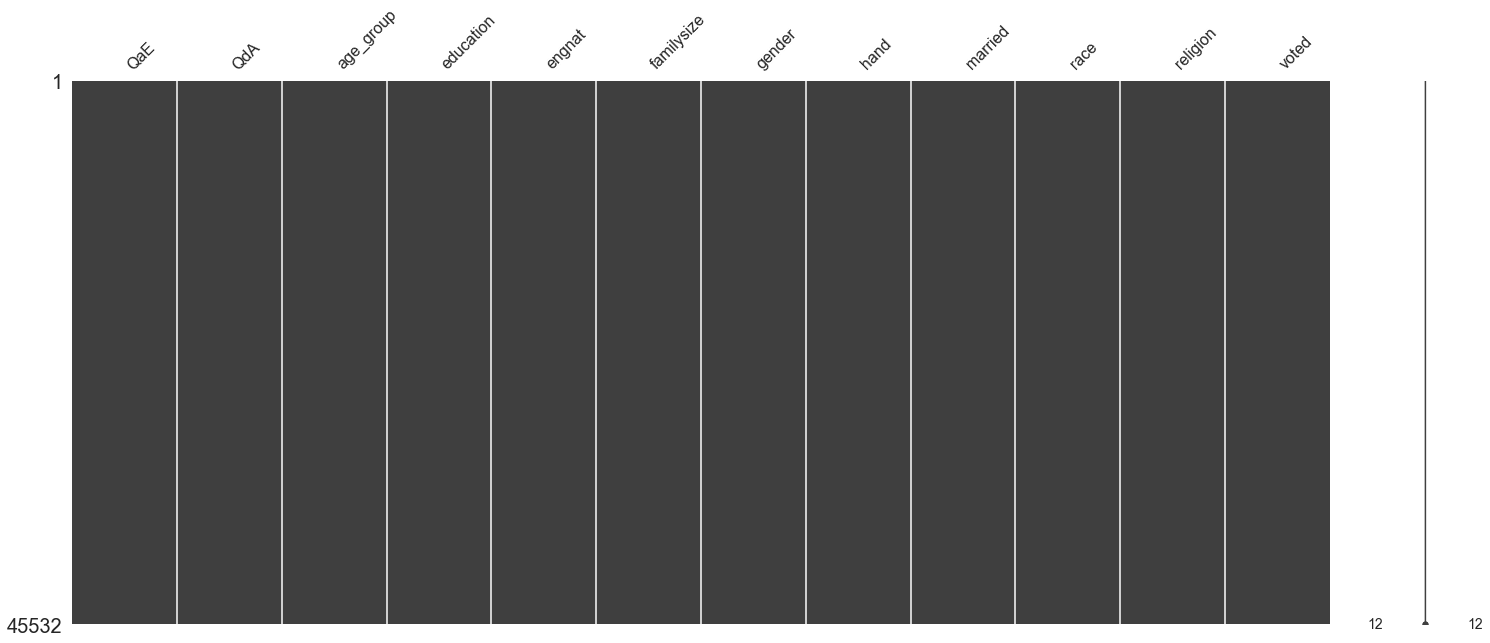

In [151]:
msno.matrix(train)

# Preprocessing

In [152]:
#labelencoding
label = LabelEncoder()
train['gender_code'] = label.fit_transform(train['gender'])
train['age_group_code'] = label.fit_transform(train['age_group'])
train['race_code'] = label.fit_transform(train['race'])
train['religion_code'] = label.fit_transform(train['religion'])

test['gender_code'] = label.fit_transform(test['gender'])
test['age_group_code'] = label.fit_transform(test['age_group'])
test['race_code'] = label.fit_transform(test['race'])
test['religion_code'] = label.fit_transform(test['religion'])

drop2 = ['gender','age_group','race','religion']
train = train.drop(drop2, axis = 1)
test = test.drop(drop2, axis = 1)

In [153]:
train.head()

,QaE,QdA,education,engnat,familysize,hand,married,voted,gender_code,age_group_code,race_code,religion_code
index,,,,,,,,,,,,
0,363,1.0,2,1,4,1,3,2,0,3,6,10
1,647,5.0,4,2,3,1,1,2,0,2,1,7
2,1623,4.0,3,1,3,1,2,1,1,3,6,10
3,504,3.0,4,2,0,1,1,1,0,2,1,7
4,927,2.0,3,1,2,1,2,1,1,2,6,0


# Visualization

<BarContainer object of 2 artists>

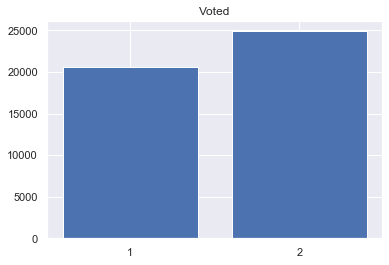

In [154]:
#target 변수의 분포 파악
train_y = train['voted']

tar = [str(train_y.unique()[1]), str(train_y.unique()[0])]
count= [train_y.value_counts()[1], train_y.value_counts()[2]]
plt.title('Voted')
plt.bar(tar, count)

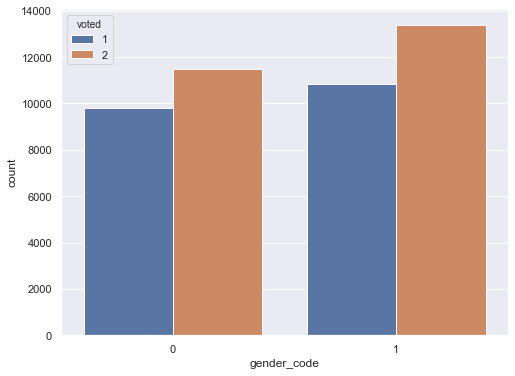

In [155]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='gender_code', hue=train_y)

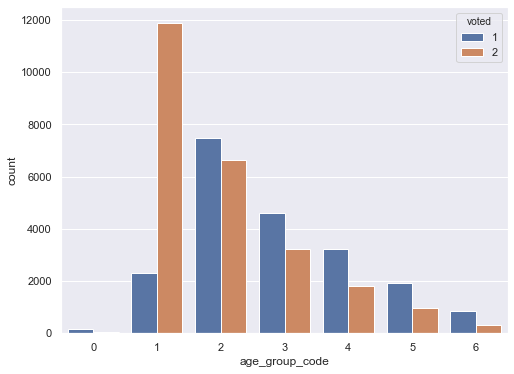

In [156]:
#굉장이 다른 성향을 보이는 age group이 존재
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'age_group_code', hue = train_y)

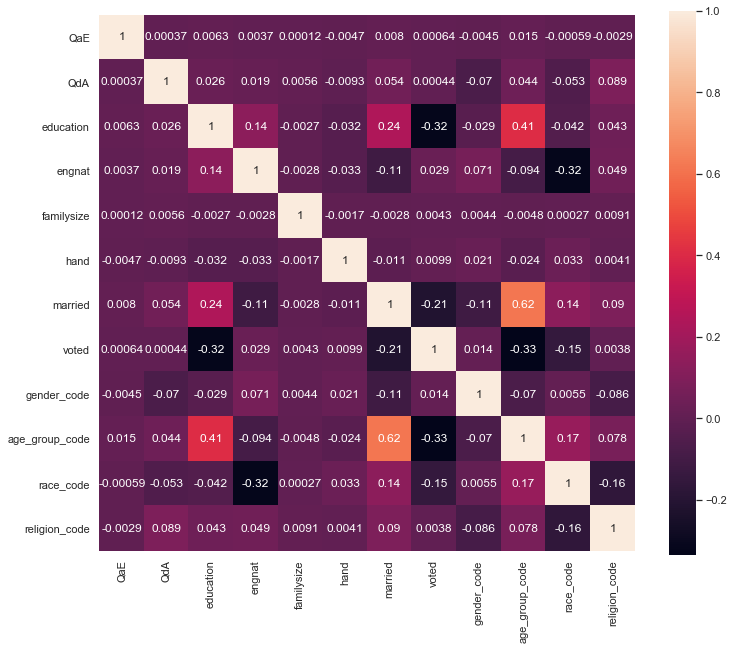

In [157]:
#heatmap
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(),square = True, annot = True)

# Question을 이용한 feature 추출 예시

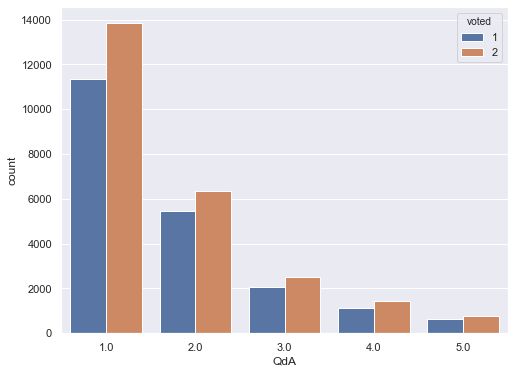

In [158]:
# 가설1: 고민 시간이 긴 질문은 영향을 많이 주는 질문일 것이다.-> Qd
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'QdA', hue = train_y)

In [159]:
# 가설2: 특정 성향의 사람들은 답변 응답시간이 더 길 것이다.
def plot_to_voted(data, var, target):
    plt.figure(figsize = (8,6))
    for tar in target:
        u = np.percentile(data[data['voted']==tar][var],95)
        d = np.percentile(data[data['voted']==tar][var],5)
        column = [val for val in data[data['voted']==tar][var] if d < val < u]
        sns.distplot(column)
    plt.title(var)
    plt.legend(target)
    plt.show()

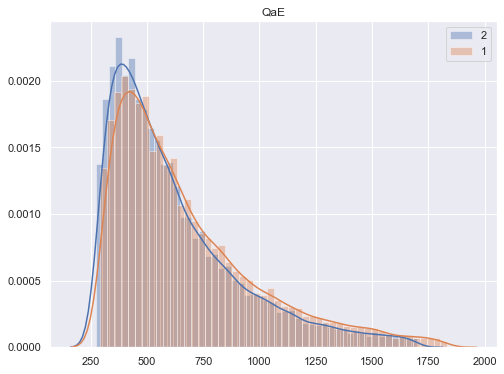

In [160]:
plot_to_voted(train, 'QaE', train_y.unique())

# Modeling

In [161]:
# 변수 제거
drop_last = ['familysize', 'gender_code','hand','education']
new_train= train.drop(drop_last, axis = 1)
new_train = new_train.drop(['voted'], axis = 1)
test = test.drop(drop_last, axis = 1)

In [162]:
new_train.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,363,1.0,1,3,3,6,10
1,647,5.0,2,1,2,1,7
2,1623,4.0,1,2,3,6,10
3,504,3.0,2,1,2,1,7
4,927,2.0,1,2,2,6,0


In [165]:
test.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,736,1.0,2,1,1,6,6
1,514,3.0,2,1,1,5,3
2,500,2.0,2,2,3,5,5
3,669,2.0,1,2,6,6,3
4,499,2.0,1,1,1,6,0


In [166]:
!pip install lightgbm

In [167]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier(n_estimators=500)
model.fit(new_train, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [168]:
pred_y = model.predict(test)

In [169]:
pred_y

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

# Submission

In [178]:
submission['voted']=pred_y
submission

,voted
0,2
1,2
2,1
3,1
4,2
...,...
11378,2
11379,2
11380,1
11381,1


In [177]:
submission.to_csv('./result/submission.csv')

In [176]:
submission = pd.read_csv('./result/submission.csv', index_col=0)
submission.head()

,voted
0,2
1,2
2,1
3,1
4,2


### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=20, shuffle=True, random_state=0) 

### kNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 31)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# kNN score
round(np.mean(score)*100, 2)

### Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

### Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

### Naive Bayes

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

### SVM (Support Vector Machine)

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)